In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', color_codes=True)
%matplotlib inline

In [2]:
dataset = pd.read_csv('full_data.csv', index_col=0)
print(dataset.shape)
dataset.index.name = 'Index'
dataset.columns = map(str.capitalize, dataset.columns)
dataset.head(5)

(100798, 10)


,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [3]:
dataset_Gun = dataset
dataset_Gun.sort_values(['Year', 'Month'], inplace=True)

In [4]:
dataset_Gun.Sex.value_counts(normalize=False)

Sex
M    86349
F    14449
Name: count, dtype: int64

In [6]:
dataset_byGender = dataset_Gun.groupby('Sex').count()
dataset_byGender

,Year,Month,Intent,Police,Age,Race,Hispanic,Place,Education
Sex,,,,,,,,,
F,14449,14449,14449,14449,14446,14449,14449,14386,14243
M,86349,86349,86348,86349,86334,86349,86349,85028,85133


<Axes: title={'center': 'Annual U.S.suicide gun deaths \n 2012-2014, by gender'}, xlabel='Sex'>

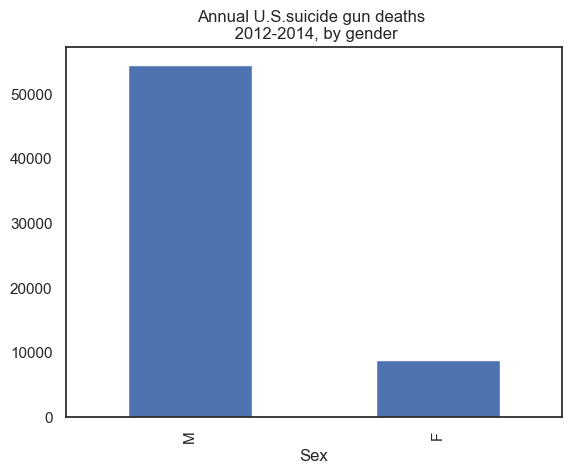

In [12]:
dataset_suicide_Gender = dataset_Gun[dataset_Gun["Intent"] == "Suicide"]
dataset_suicide_Gender.Sex.value_counts(normalize=False).plot.bar(
title='Annual U.S.suicide gun deaths \n 2012-2014, by gender')

<Axes: title={'center': 'Annual U.S. suicidegun deaths \n 2012-2014, by gender'}, xlabel='Sex'>

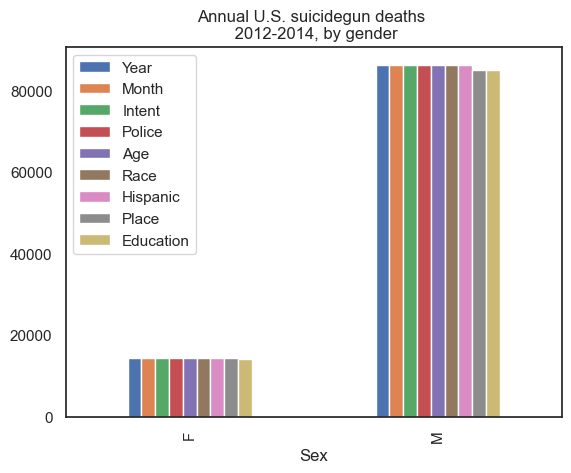

In [12]:
dataset_byGender.plot.bar(title='Annual U.S. suicidegun deaths \n 2012-2014, by gender')

In [38]:
dataset_byRace =  (dataset_Gun.Race.value_counts(normalize=False) * 100 / 100000)
dataset_byRace

Race
White                             66.237
Black                             23.296
Hispanic                           9.022
Asian/Pacific Islander             1.326
Native American/Native Alaskan     0.917
Name: count, dtype: float64

In [28]:
dataset_byRace = dataset_Gun.groupby('Race').count()
dataset_byRace

,Year,Month,Intent,Police,Sex,Age,Hispanic,Place,Education
Race,,,,,,,,,
Asian/Pacific Islander,1326,1326,1326,1326,1326,1326,1326,1296,1290
Black,23296,23296,23296,23296,23296,23293,23296,22943,23025
Hispanic,9022,9022,9022,9022,9022,9021,9022,8742,8880
Native American/Native Alaskan,917,917,917,917,917,916,917,892,903
White,66237,66237,66236,66237,66237,66224,66237,65541,65278


<Axes: title={'center': 'Percent death toll from guns in the United States \nfrom 2012 to 2014, by race'}, xlabel='Race'>

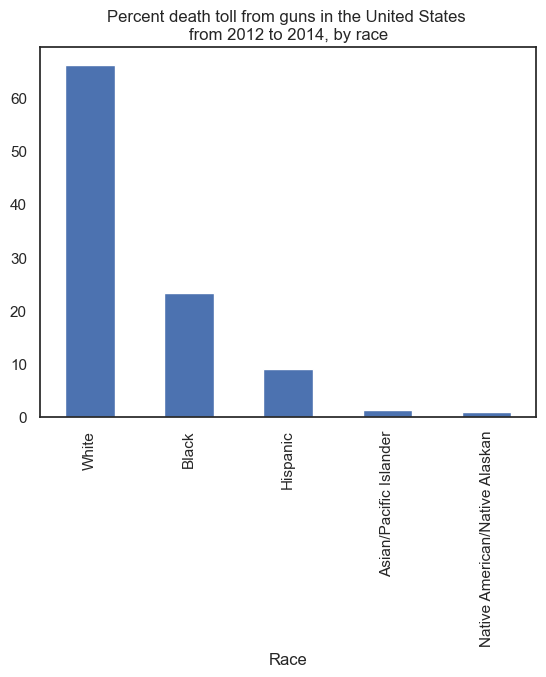

In [13]:
(dataset_Gun.Race.value_counts(ascending=False)*100/100000).plot.bar(
    title='Percent death toll from guns in the United States \nfrom 2012 to 2014, by race')

In [8]:
dataset_Gun.Intent.value_counts(sort =True,ascending=False)

Intent
Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: count, dtype: int64

<Axes: title={'center': 'Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause'}, xlabel='Intent'>

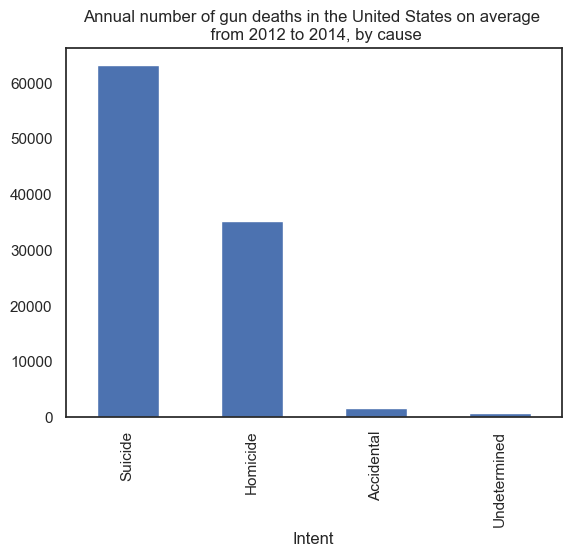

In [15]:
dataset_Gun.Intent.value_counts(sort=True).plot.bar(
title='Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause')

In [49]:
dataset_Gun.Intent.value_counts(ascending=False)*100/100000

Intent
Suicide         63.175
Homicide        35.176
Accidental       1.639
Undetermined     0.807
Name: count, dtype: float64

<Axes: title={'center': 'Rate gun deaths in the U.S. per 100,000 population \n2012-2014, by race'}, xlabel='Intent'>

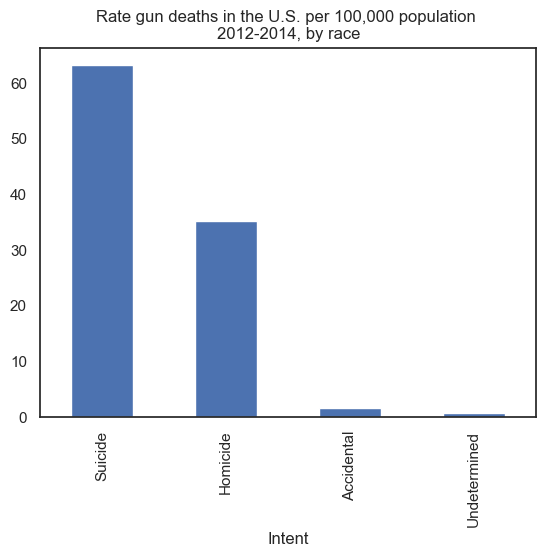

In [16]:
(dataset_Gun.Intent.value_counts(ascending=False)*100/100000).plot.bar(
title='Rate gun deaths in the U.S. per 100,000 population \n2012-2014, by race')

In [9]:
dataset_suicide=dataset[dataset["Intent"]=="Suicide"]
datasetSuicide=dataset_suicide.Year.value_counts(ascending=False) *100/100000
datasetSuicide.sort_values(ascending=True)

Year
2012    20.666
2013    21.175
2014    21.334
Name: count, dtype: float64

<Axes: title={'center': 'Percentage of annual suicide gun deaths in the United States \nfrom 2012 to 2014, by year'}, xlabel='Year'>

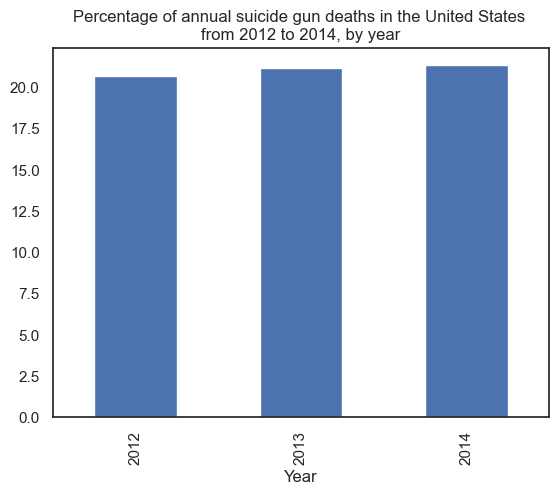

In [17]:
datasetSuicide.sort_values(ascending=True).plot.bar(
title='Percentage of annual suicide gun deaths in the United States \nfrom 2012 to 2014, by year')